In [1]:
import numpy as np

In [2]:
import pandas as pd
df = pd.read_csv("samples/data.csv", header=0)

Take a peak at the data using the head() function:

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


info() is not as powerful as R's summary(), but it provides a good description of columns and data types. I like to convert 'objects' to categories because most scikit-learn algorithms only handle numerical values.

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [29]:
category_columns = []
for col in df.columns:
    if (df[col].dtype == object):
        category_columns += [col]
        
for col in category_columns:
    df[col] = df[col].astype('category')

trainDf = df[df['shot_made_flag'].notnull()]
trainDf.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,26,3,12,20000012,34.0443,-157,0,-118.4268,10,1,...,0,3,4,2,1610612747,0,310,28,25,2
2,26,3,35,20000012,33.9093,-101,135,-118.3708,7,1,...,0,2,4,0,1610612747,0,310,28,25,3
3,26,3,43,20000012,33.8693,138,175,-118.1318,6,1,...,0,4,4,0,1610612747,0,310,28,25,4
4,5,1,155,20000012,34.0443,0,0,-118.2698,6,2,...,0,1,5,4,1610612747,0,310,28,25,5
5,26,3,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,0,3,4,2,1610612747,0,310,28,25,6


In [30]:
for col in trainDf.columns:
    print("Column :'{}', Mean :'{}', Std :'{}'".format(col,df[col].mean(),df[col].std()))

Column :'action_type', Mean :'26.8536013291', Std :'9.59104841408'
Column :'combined_shot_type', Mean :'3.08691403069', Std :'0.638599460118'
Column :'game_event_id', Mean :'249.190800404', Std :'150.003711999'
Column :'game_id', Mean :'24764065.8681', Std :'7755174.8902'
Column :'lat', Mean :'33.9531924651', Std :'0.0877913612201'
Column :'loc_x', Mean :'7.11049939734', Std :'110.12457809'
Column :'loc_y', Mean :'91.1075349383', Std :'87.7913612201'
Column :'lon', Mean :'-118.262689501', Std :'0.11012457809'
Column :'minutes_remaining', Mean :'4.88562400235', Std :'3.44989747779'
Column :'period', Mean :'2.51943186631', Std :'1.15366548915'
Column :'playoffs', Mean :'0.146561553246', Std :'0.353674057849'
Column :'season', Mean :'9.40977945728', Std :'4.86382314776'
Column :'seconds_remaining', Mean :'28.3650845359', Std :'17.4789492304'
Column :'shot_distance', Mean :'13.4374368831', Std :'9.37418938817'
Column :'shot_made_flag', Mean :'0.44616103047', Std :'0.497102586692'
Column :'

Now let's look for correlations between columns. First let's map the field by x and y positions. We want to see 
if there is a preferred position for scoring.

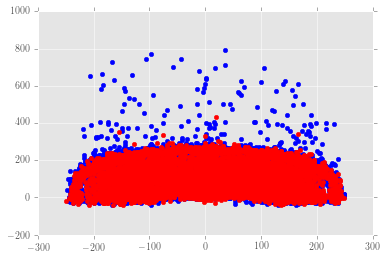

In [106]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
figure = plt.figure()
plt.scatter(trainDf[trainDf['shot_made_flag']==0]['loc_x'],trainDf[trainDf['shot_made_flag']==0]['loc_y'],color='b')
plt.scatter(trainDf[trainDf['shot_made_flag']==1]['loc_x'],trainDf[trainDf['shot_made_flag']==1]['loc_y'],color='r')

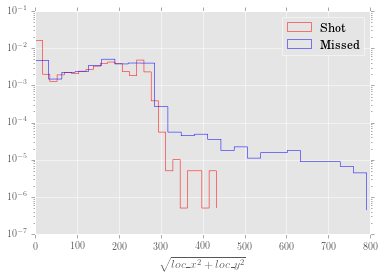

In [107]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def sq(row):
    return row.apply(np.square)

sumSquares_bkg = trainDf[trainDf['shot_made_flag']==0].apply(sq,axis=1)['loc_x']+trainDf[trainDf['shot_made_flag']==0].apply(sq,axis=1)['loc_y']
sumSquares_sig = trainDf[trainDf['shot_made_flag']==1].apply(sq,axis=1)['loc_x']+trainDf[trainDf['shot_made_flag']==1].apply(sq,axis=1)['loc_y']
squares_bkg = sumSquares_bkg.apply(lambda x:np.sqrt(x))
squares_sig = sumSquares_sig.apply(lambda x:np.sqrt(x))

figure = plt.figure()
plt.hist(squares_sig,bins=25,log=True,histtype='step',color='r',label='Shot',normed=True)
plt.hist(squares_bkg,bins=25,log=True, histtype='step',color='b',label='Missed',normed=True)
plt.xlabel(r"$\sqrt{loc\_x^{2} + loc\_y^{2}}$")
plt.legend()

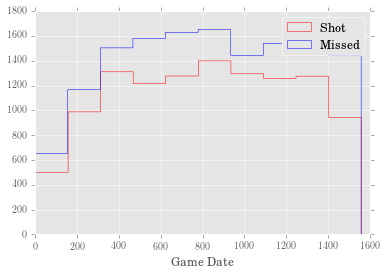

In [110]:
gameDate_bkg = trainDf[trainDf['shot_made_flag']==0]['game_date']
gameDate_sig = trainDf[trainDf['shot_made_flag']==1]['game_date']
figure = plt.figure()
plt.hist(gameDate_sig,histtype='step',color='r',label='Shot')
plt.hist(gameDate_bkg,histtype='step',color='b',label='Missed')
plt.xlabel('Game Date')
plt.legend()

In [112]:
trainDf[trainDf['shot_made_flag']==0]['game_date'].head(20)

1     310
3     310
5     310
9     310
10    310
13    311
14    311
15    311
18    311
20    311
21    311
25    311
26    311
27    311
28    311
29    311
31    311
40    312
43    312
46    312
Name: game_date, dtype: int16